<a href="https://colab.research.google.com/github/salmanromeo/ECEN_5513_Stochastic_Systems/blob/main/Function_of_Random_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Let $X+iY$ be a complex signal and its magnitude is given by $Z$$=$$√(X^² + Y^²)$, and phase $θ = tan^{-1}(Y/X)$ if $X>=0$, and phase $θ = tan^{-1}(Y/X)+π$ if $X<0$.
#####X~N(0,1)
#####Y~N(0,1).
#####Use the Python functions to create a Gaussian distributed random value of $X$. Repeat this procedure and form a new random value of $Y$. Finally, form a random value of $Z$ and $θ$, respectively. Repeat this procedure many times to create a large number of realizations of $Z$ and $θ$. Using these samples, estimate and plot the probability density functions of $Z$ and $θ$ respectively. Find analytical distributions among what we learned in the lectures that seem to fit your estimated PDFs.

#####Submit plots of sample distributions and analytical distributions (as well as names and parameters of the analytical distributions).

#####Note: X~N(0,1) denotes random variable X follows a Gaussian distribution with mean $0$ and variance $1$.

#####"Histogram" would be needed.

**Estimate and plot the probability density functions (PDFs) of $Z$ and $θ$ using histograms**

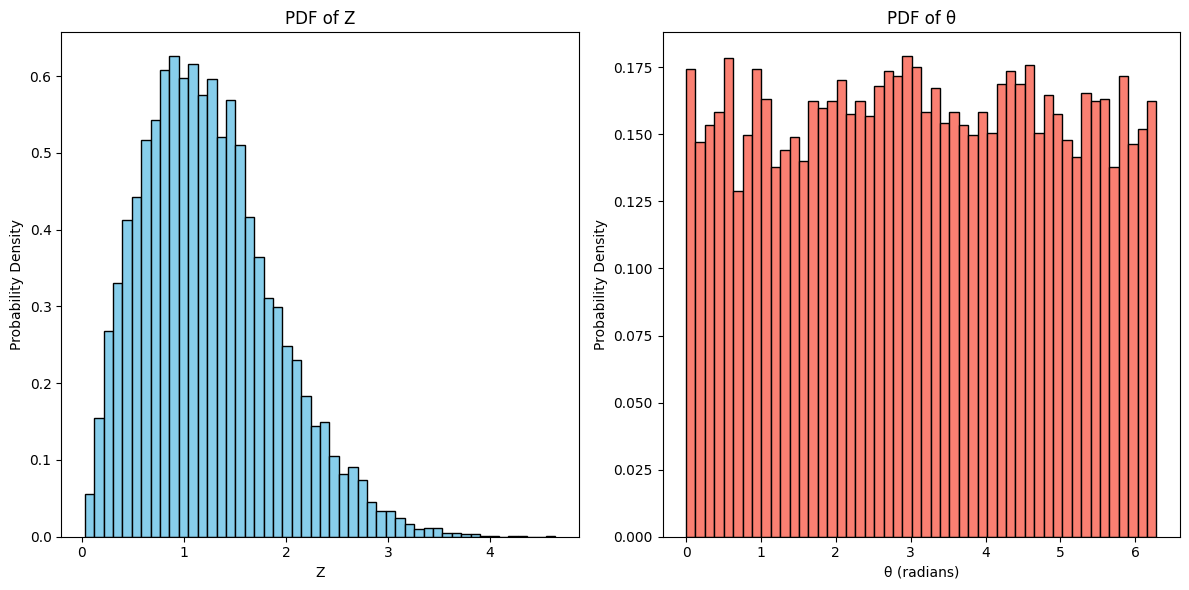

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of realizations
num_samples = 10000

# Generate random values for X and Y
X = np.random.normal(0, 1, num_samples)
Y = np.random.normal(0, 1, num_samples)

# Calculate magnitude Z
Z = np.sqrt(X**2 + Y**2)

# Calculate phase θ
theta = np.arctan2(Y, X)

# Ensure θ is in the range [0, 2π]
theta[theta < 0] += 2 * np.pi

# Plot the histogram of Z
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(Z, bins=50, density=True, color='skyblue', edgecolor='black')
plt.title('PDF of Z')
plt.xlabel('Z')
plt.ylabel('Probability Density')

# Plot the histogram of θ
plt.subplot(1, 2, 2)
plt.hist(theta, bins=50, density=True, color='salmon', edgecolor='black')
plt.title('PDF of θ')
plt.xlabel('θ (radians)')
plt.ylabel('Probability Density')

plt.tight_layout()
plt.show()

**Analytical distributions that fit your estimated PDFs**

#####For $Z$, it may resemble a **Rayleigh distribution**, and for $θ$, it might resemble a **uniform distribution** over the interval $[0, 2π]$.
#####We use **scipy.stats** to fit a Rayleigh distribution to $Z$ and a uniform distribution to $θ$.

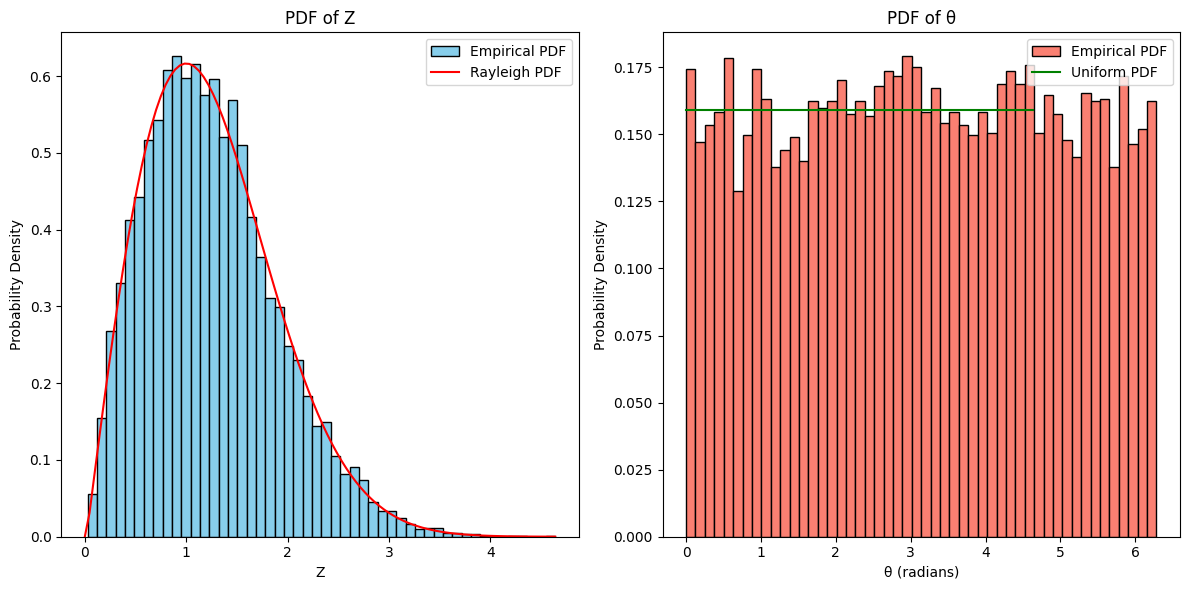

In [6]:
from scipy.stats import rayleigh, uniform

# Plot the histogram of Z with a fitted Rayleigh distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(Z, bins=50, density=True, color='skyblue', edgecolor='black', label='Empirical PDF')
plt.title('PDF of Z')
plt.xlabel('Z')
plt.ylabel('Probability Density')

# Fit and plot a Rayleigh distribution
params = rayleigh.fit(Z)
x = np.linspace(0, max(Z), 100)
pdf = rayleigh.pdf(x, *params)
plt.plot(x, pdf, 'r-', label='Rayleigh PDF')

# Add a legend
plt.legend()

# Plot the histogram of θ with a fitted uniform distribution
plt.subplot(1, 2, 2)
plt.hist(theta, bins=50, density=True, color='salmon', edgecolor='black', label='Empirical PDF')
plt.title('PDF of θ')
plt.xlabel('θ (radians)')
plt.ylabel('Probability Density')

# Fit and plot a uniform distribution
uniform_pdf = uniform.pdf(x, loc=0, scale=2*np.pi)
plt.plot(x, uniform_pdf, 'g-', label='Uniform PDF')

# Add a legend
plt.legend()

plt.tight_layout()
plt.show()